<h1> extarct features as 

In [1]:
import os
import time
import joblib
import librosa
import numpy as np
import sys
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

import librosa.display
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}

working_dir_path = pathlib.Path().absolute()
#x, y = [], []
p = str(working_dir_path) + '\\features\\'
x=[]
y=[]


In [2]:
        for subdir, dirs, files in os.walk(p):
            for file in files:
                  
             
                    X, sample_rate = librosa.load(os.path.join(subdir, file),
                                                  res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate,
                                                         n_mfcc=40).T, axis=0)
              
                    emotion=emotions[file.split("-")[2]]
                    x.append(mfccs)
                    y.append(emotion) 
                  
               
     

            
                   
                
   


              
                  
                 
                                                       
                                                  


In [3]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [4]:
print(x.shape)




(104, 40)


In [7]:
y=y.rename(columns= {0: 'emotion'})
data = pd.concat([x, y],axis=1)
data.head(200)
#data.to_csv("mycf.csv")


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-663.830627,61.380005,2.275193,12.700736,-4.215594,-4.703434,-11.695962,-3.269569,-8.981364,-0.019918,...,-0.269033,0.044591,-0.209263,-0.497777,0.500730,1.943027,2.300724,2.240043,1.939023,neutral
1,-673.036743,62.550442,0.601472,15.311871,-4.809893,-4.601825,-12.602208,-1.957693,-8.404150,1.015036,...,-0.393555,-2.115013,-1.691603,0.042674,2.933836,3.313947,2.256333,1.903144,1.184944,neutral
2,-636.092346,56.017391,-0.508636,12.538565,-3.373843,-7.167714,-18.058207,-3.441952,-9.223587,2.852147,...,2.261099,1.165017,2.384331,0.502218,0.865604,0.352303,0.973637,1.323550,1.374901,neutral
3,-638.794617,48.271980,1.397659,12.303373,-3.544873,-6.282190,-14.747787,-4.575645,-7.459646,-1.576208,...,4.398610,3.808505,2.301317,0.672255,-0.398797,0.114003,2.531885,3.795937,1.760171,neutral
4,-711.436096,60.887489,-1.154609,12.516333,-4.983691,-2.308121,-15.428706,-0.845172,-6.211278,0.285085,...,1.891175,2.590123,2.346969,0.029042,0.865735,-0.001382,2.618528,4.170864,6.991181,calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,-582.637939,48.820782,-16.329767,12.617120,-4.690404,-7.086534,-19.501089,-13.460738,-10.528955,5.261615,...,1.447642,-2.163419,-5.754956,-4.544811,-1.191723,1.283591,0.647691,2.411599,7.879185,fear
100,-494.037506,40.074280,-29.732920,10.194907,-11.434443,-13.527353,-14.379373,-12.018192,-19.639320,8.763931,...,1.732249,-3.699970,-5.790808,-0.844432,1.873541,1.862227,1.524597,5.128008,5.359361,fear
101,-491.735077,45.773010,-27.293346,11.681332,-8.587379,-12.628489,-11.377351,-11.430408,-18.452673,8.750471,...,1.694435,-3.772476,-3.590554,-2.354606,0.582010,3.016168,0.887626,5.221513,8.017483,fear
102,-489.889038,42.896622,-23.896330,12.002479,-5.831614,-16.097464,-18.426285,-13.035479,-19.258846,8.024988,...,2.498777,-2.920087,-7.054708,-5.029229,2.976806,1.666268,1.123690,4.165655,9.678352,fear


In [ ]:
data.head()

In [9]:
  print(X)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.7960836e-08
  8.8305114e-09  0.0000000e+00]


In [10]:
path1='mycf.csv'
data1=pd.read_csv(path1,header=None,names=['mfccs','emotion'])


In [11]:
print(data1.describe())

            mfccs
count  209.000000
mean     4.405211
std      4.246071
min     -0.783049
25%      1.184944
50%      2.534698
75%      7.667303
max     39.000000


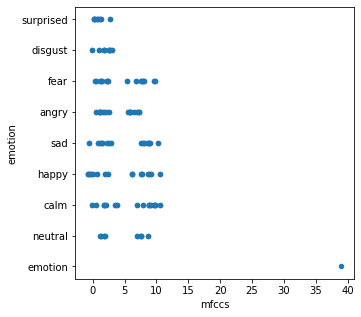

In [19]:
data1.plot(kind='scatter',x='mfccs',y='emotion',figsize=(5,5))

In [23]:
filew='03-01-01-01-02-01-16.wav'
X1, sample_rate1 = librosa.load(filew)
                                                 

In [36]:
mfccs1 = librosa.feature.mfcc(X1, sr=sample_rate1)

(20, 156)


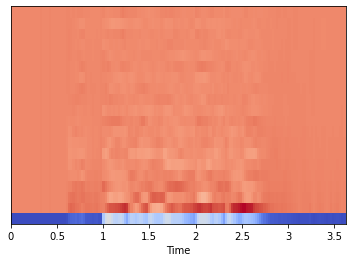

In [47]:
mfccs = librosa.feature.mfcc(X1, sr=sample_rate1)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sample_rate1, x_axis='time')
plt.show()